/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='date', ylabel='Sales_Value_x'>

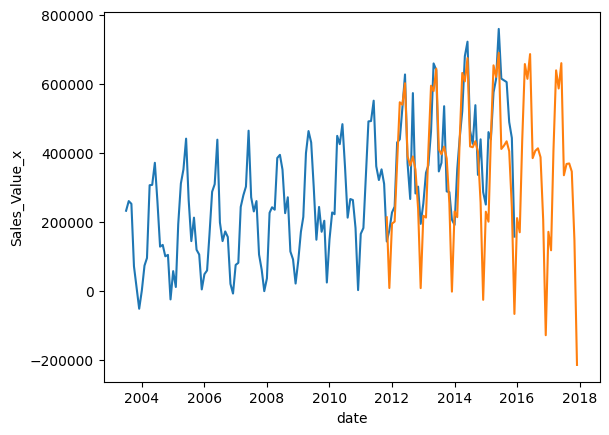

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


df=pd.read_excel('/content/Truck Details_new.xlsx',sheet_name='Vehical Potentials')
df=df[['date','Sales_Value']]
df=df.set_index('date')




autoari=auto_arima(df,seasonal=True,maxiter=300,suppress_warnongs=True)
l=round(len(df)/3)
train=df[:-l]
test=df[-l:]

p=autoari.order[0]
d=autoari.order[1]+1
q=autoari.order[2]+1
model=SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12),trend=None)
model=model.fit()

trained_model=model.get_forecast(len(test)+24)

predictions=trained_model.predicted_mean

predictions=pd.DataFrame(predictions)

predictions=predictions.reset_index()

df=df.reset_index()
predictions.columns=df.columns
df=df.merge(predictions,how='outer',on='date')

sns.lineplot(x=df['date'],y=df['Sales_Value_x'])
sns.lineplot(x=df['date'],y=df['Sales_Value_y'])